## 1.导入数据

导入库

In [32]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

导入数据

In [33]:
# 导入数据
iris = datasets.load_iris()     # 花的数据，sklearn中的数据库（就是上面的花）
X = iris.data[:,:3]             # X表示：花的属性 ; 切除最后一列
y = iris.target                # y表示：花的分类

## 2.训练模型 给出预测

训练模型 输出各自的均值方差（假设符合高斯分布）

In [34]:
gmm = GaussianMixture(n_components = 3,covariance_type='full',random_state=0)  # 选定GMM模型
gmm.fit(X)                                                                     #  将数据喂给模型
print('预测均值 = \n',gmm.means_)
print('预测方差 = \n',gmm.covariances_)

预测均值 = 
 [[5.0060001  3.42800022 1.46200003]
 [6.06484109 2.81865029 4.49503422]
 [6.6298468  2.97153653 5.67275436]]
预测方差 = 
 [[[0.12176497 0.09723191 0.01602799]
  [0.09723191 0.14081678 0.01146397]
  [0.01602799 0.01146397 0.029557  ]]

 [[0.28288871 0.09672907 0.25119586]
  [0.09672907 0.09603064 0.11237849]
  [0.25119586 0.11237849 0.37288505]]

 [[0.51084202 0.10986135 0.38433907]
  [0.10986135 0.1197479  0.07822918]
  [0.38433907 0.07822918 0.3349755 ]]]


In [35]:
y_hat = gmm.predict(X)     # 给出预测值
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2], dtype=int64)

In [36]:
# 用之前存在的真实值y 和预测值对比，算出得分
acc = 100 * np.mean(y_hat == y)
acc

90.66666666666666

## 3.绘制数据图

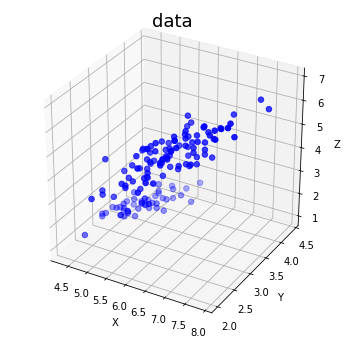

In [37]:
# 原始数据绘图
fig1 = plt.figure(figsize=(13,6),facecolor='w')
ax = fig1.add_subplot(121,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c='b',s=30,marker='o',depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('data',fontsize=18)
plt.show()

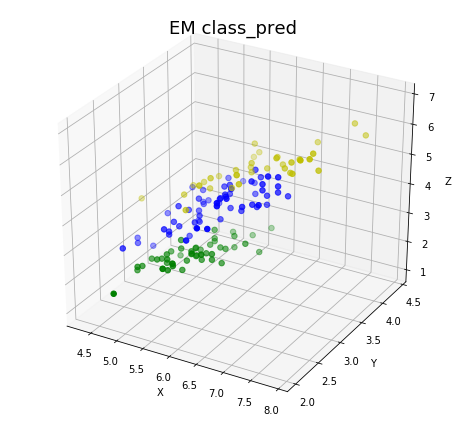

In [40]:
# 预测数据绘图
fig2 = plt.figure(figsize=(13,6),facecolor='w')
ax = fig2.add_subplot(121,projection='3d')

# 绘制出不同的类别
ax.scatter(X[y_hat==0,0],X[y_hat==0,1],X[y_hat==0,2],c='g',s=30,marker='o',depthshade=True)
ax.scatter(X[y_hat==1,0],X[y_hat==1,1],X[y_hat==1,2],c='b',s=30,marker='o',depthshade=True)
ax.scatter(X[y_hat==2,0],X[y_hat==2,1],X[y_hat==2,2],c='y',s=30,marker='o',depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('EM class_pred',fontsize=18)

plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()

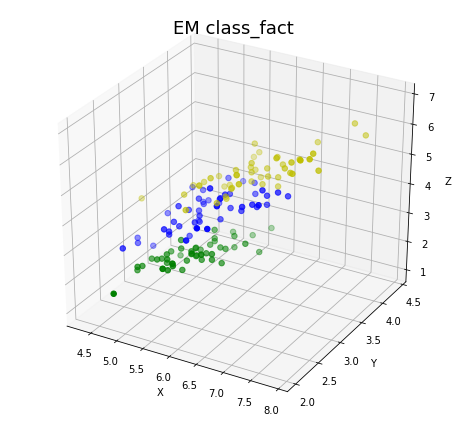

In [41]:
# 真实数据绘图
fig3 = plt.figure(figsize=(13,6),facecolor='w')
ax = fig3.add_subplot(121,projection='3d')

# 绘制出不同的类别
ax.scatter(X[y==0,0],X[y==0,1],X[y==0,2],c='g',s=30,marker='o',depthshade=True)
ax.scatter(X[y==1,0],X[y==1,1],X[y==1,2],c='b',s=30,marker='o',depthshade=True)
ax.scatter(X[y==2,0],X[y==2,1],X[y==2,2],c='y',s=30,marker='o',depthshade=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('EM class_fact',fontsize=18)

plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()